In [1]:
import xarray as xr
import dask
import matplotlib.pyplot as plt
import glob
import ipywidgets as widgets
from IPython.display import display

# Percorso dove hai i file NetCDF
data_path = r"C:\Users\Veronica\OneDrive - Politecnico di Milano\POLIMI\SAHARA\prova"

In [2]:
rcp26_files = sorted(glob.glob(f"{data_path}\*tas*rcp26*.nc"))
rcp45_files = sorted(glob.glob(f"{data_path}\*tas*rcp45*.nc"))
rcp85_files = sorted(glob.glob(f"{data_path}\*tas*rcp85*.nc"))

In [3]:
ds_rcp26 = xr.open_mfdataset(
    rcp26_files,
    combine='by_coords',
    chunks={"time": 365}   # Esempio: 1 anno per chunk
)

ds_rcp45 = xr.open_mfdataset(
    rcp45_files,
    combine='by_coords',
    chunks={"time": 365}
)

ds_rcp85 = xr.open_mfdataset(
    rcp85_files,
    combine='by_coords',
    chunks={"time": 365}
)

C:\Users\Veronica\AppData\Local\Temp\ipykernel_17892\3568060013.py:1: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 365. This could degrade performance. Instead, consider rechunking after loading.
  ds_rcp26 = xr.open_mfdataset(
C:\Users\Veronica\AppData\Local\Temp\ipykernel_17892\3568060013.py:1: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 365. This could degrade performance. Instead, consider rechunking after loading.
  ds_rcp26 = xr.open_mfdataset(
C:\Users\Veronica\AppData\Local\Temp\ipykernel_17892\3568060013.py:1: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 365. This could degrade performance. Instead, consider rechunking after loading.
  ds_rcp26 = xr.open_mfdataset(
C:\Users\Veronica\AppData\Local\Temp\ipykernel_17892\3568060013.py:7: UserWarning: The specified chunks separate the stored chunks along dimensio

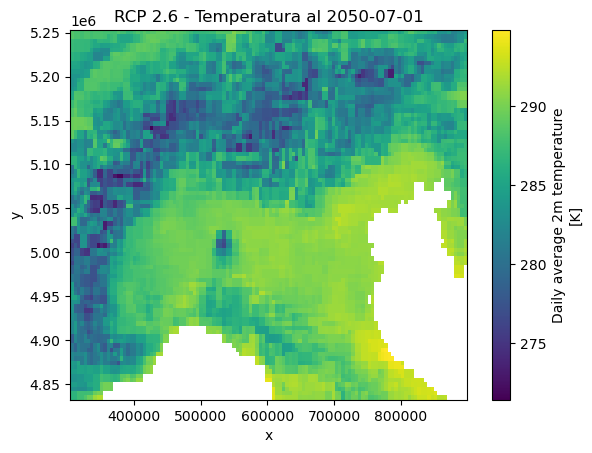

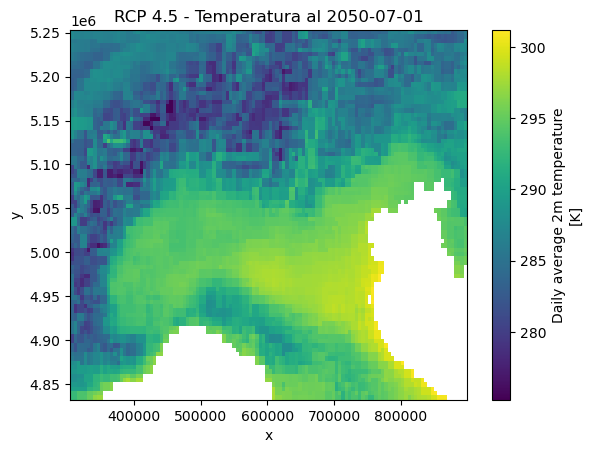

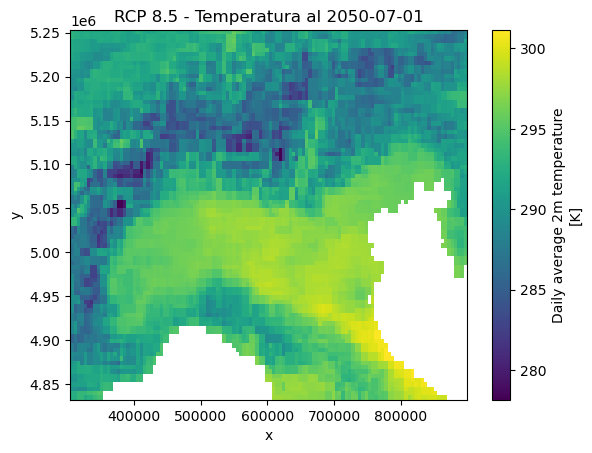

In [5]:
day_to_plot = "2050-07-01"

# Plot RCP26
ds_rcp26["tas"].sel(time=day_to_plot).plot()
plt.title(f"RCP 2.6 - Temperatura al {day_to_plot}")
plt.show()

# Plot RCP45
ds_rcp45["tas"].sel(time=day_to_plot).plot()
plt.title(f"RCP 4.5 - Temperatura al {day_to_plot}")
plt.show()

# Plot RCP85
ds_rcp85["tas"].sel(time=day_to_plot).plot()
plt.title(f"RCP 8.5 - Temperatura al {day_to_plot}")
plt.show()

In [7]:
# Calcolo media spaziale (lat e lon)
tas_spatial_mean_26 = ds_rcp26["tas"].mean(dim=["y","x"])
tas_spatial_mean_45 = ds_rcp45["tas"].mean(dim=["y","x"])
tas_spatial_mean_85 = ds_rcp85["tas"].mean(dim=["y","x"])

# Calcolo media annua
tas_annual_mean_26 = tas_spatial_mean_26.resample(time="1Y").mean()
tas_annual_mean_45 = tas_spatial_mean_45.resample(time="1Y").mean()
tas_annual_mean_85 = tas_spatial_mean_85.resample(time="1Y").mean()

C:\Users\Veronica\anaconda3\envs\climate-env\lib\site-packages\xarray\groupers.py:490: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(
C:\Users\Veronica\anaconda3\envs\climate-env\lib\site-packages\xarray\groupers.py:490: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(
C:\Users\Veronica\anaconda3\envs\climate-env\lib\site-packages\xarray\groupers.py:490: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


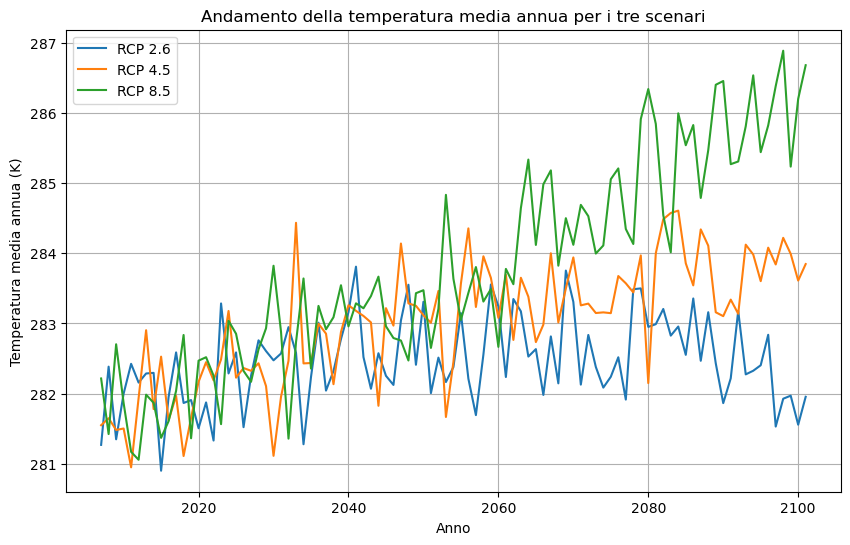

In [8]:
plt.figure(figsize=(10, 6))

plt.plot(tas_annual_mean_26.time, tas_annual_mean_26, label="RCP 2.6")
plt.plot(tas_annual_mean_45.time, tas_annual_mean_45, label="RCP 4.5")
plt.plot(tas_annual_mean_85.time, tas_annual_mean_85, label="RCP 8.5")

plt.xlabel("Anno")
plt.ylabel("Temperatura media annua (K)")
plt.title("Andamento della temperatura media annua per i tre scenari")
plt.legend()
plt.grid(True)
plt.show()

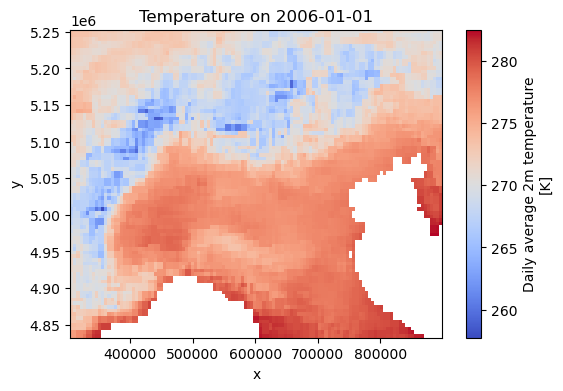

interactive(children=(IntSlider(value=0, description='Day Index', max=34333), Output()), _dom_classes=('widget…

<function __main__.plot_map(day_index)>

In [7]:
def plot_map(day_index):
    plt.figure(figsize=(6,4))
    # day_index is an integer that indexes ds.time
    ds_rcp26['tas'].isel(time=day_index).plot(cmap='coolwarm')
    date_str = str(ds_rcp26.time[day_index].values)[:10]
    plt.title(f"Temperature on {date_str}")
    plt.show()

# Create a slider from 0 to the number of time steps - 1
slider = widgets.IntSlider(
    min=0, 
    max=len(ds_rcp26.time) - 365,
    step=1,
    value=0,
    description='Day Index'
)

# Use interact to link slider with the plot function
widgets.interact(plot_map, day_index=slider)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
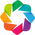

:DynamicMap   [time]
   :Image   [x,y]   (Daily average 2m temperature)

In [4]:
import holoviews as hv
hv.extension('bokeh')
import hvplot.xarray 

plot = ds_rcp26['tas'].hvplot(
    x='x', 
    y='y', 
    groupby='time',      # This creates a slider for 'time'
    cmap='coolwarm',
    title='Daily Temperature',
    #rasterize=True       # optional, for large data
)
plot